<a href="https://colab.research.google.com/github/bharathulaprasad/PredictiveMaintenance/blob/main/Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
data = pd.read_csv (r'sample_data/predictive_maintenance.csv')
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [50]:
data.nunique()

Type               3
airtemp           93
processtemp       82
rpm              941
torque           577
toolwear         246
Target             2
Failure Type       6
nf              8563
dtype: int64

# Data Preprocessing
The UDI and Product ID column is not needed as it doesnt carry any useful information

In [8]:
data = data.drop(["UDI",'Product ID'],axis=1)
data.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure


# Exploratory data analysis (EDA) 
is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods

In [9]:
data.groupby(['Target','Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})

count
Target Failure Type                   
0      No Failure                 9643
       Random Failures              18
1      Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

In [10]:
data.groupby(['Target','Failure Type']).median()

Air temperature [K]  ...  Tool wear [min]
Target Failure Type                                   ...                 
0      No Failure                             300.00  ...            107.0
       Random Failures                        300.75  ...            142.0
1      Heat Dissipation Failure               302.45  ...            106.0
       No Failure                             300.50  ...            119.0
       Overstrain Failure                     299.45  ...            207.0
       Power Failure                          300.40  ...            100.0
       Tool Wear Failure                      300.40  ...            215.0

[7 rows x 5 columns]

In [11]:
data.groupby(['Type','Target']).median()

Air temperature [K]  ...  Tool wear [min]
Type Target                       ...                 
H    0                     299.7  ...            106.0
     1                     302.0  ...            147.0
L    0                     300.1  ...            107.0
     1                     301.2  ...            182.0
M    0                     300.1  ...            105.0
     1                     302.0  ...            125.0

[6 rows x 5 columns]

#Data Visualization

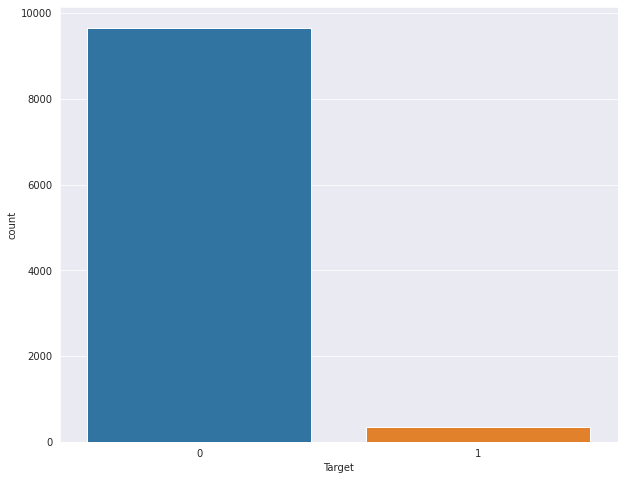

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(data=data,x="Target")

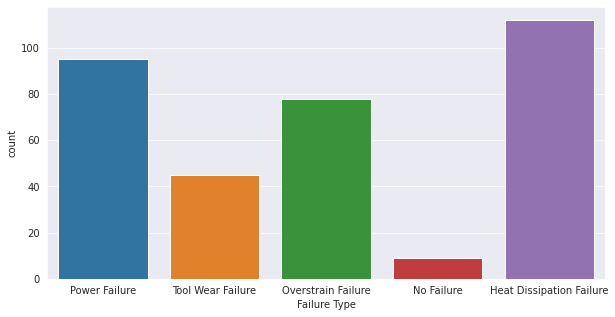

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=data[data['Target']==1],x="Failure Type")

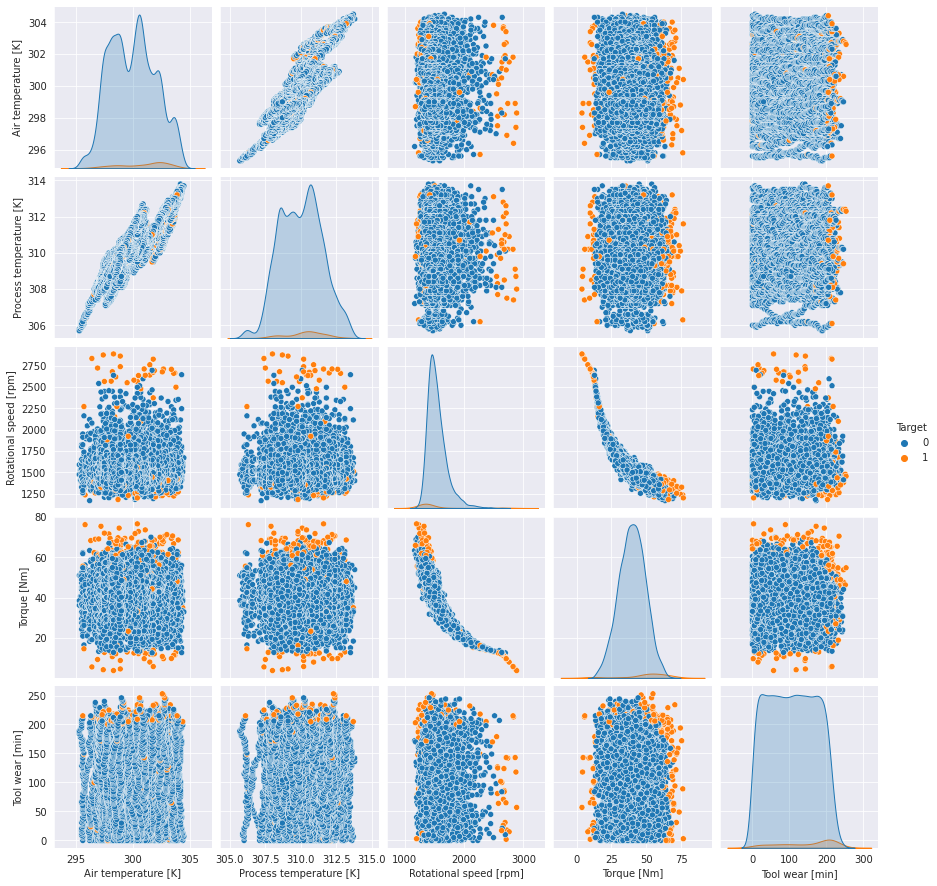

In [15]:
sns.pairplot(data,hue='Target')

# Lets now focus on if there is a failure or no failure, and later focus on what type of failure is that.

In [17]:
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

#Box plot

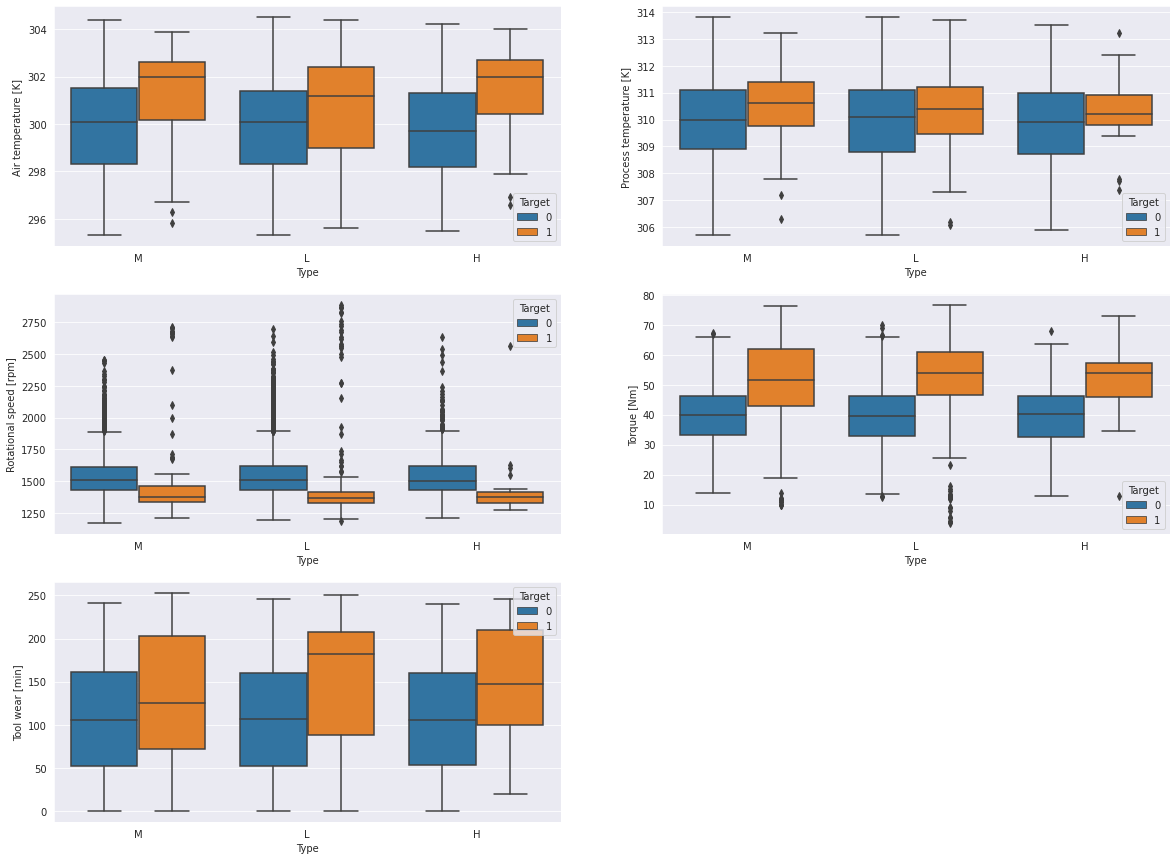

In [18]:
plt.figure(figsize = (20,15))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m)
    sns.boxplot(data=data,y=i,x="Type",hue="Target")
    m+=1

In [19]:
import plotly.express as px

fig = px.scatter_3d(data, x='Tool wear [min]', y='Torque [Nm]', z='Rotational speed [rpm]',
              color='Target')
fig.show()

In [20]:
def feat_prob(feature,data):
    x,y = [],[]
    for j in data[feature].unique():
        temp = data
        temp = temp[temp[feature]>=j]
        y.append(round((temp.Target.mean()*100),2))
        x.append(j)
    return(x,y)

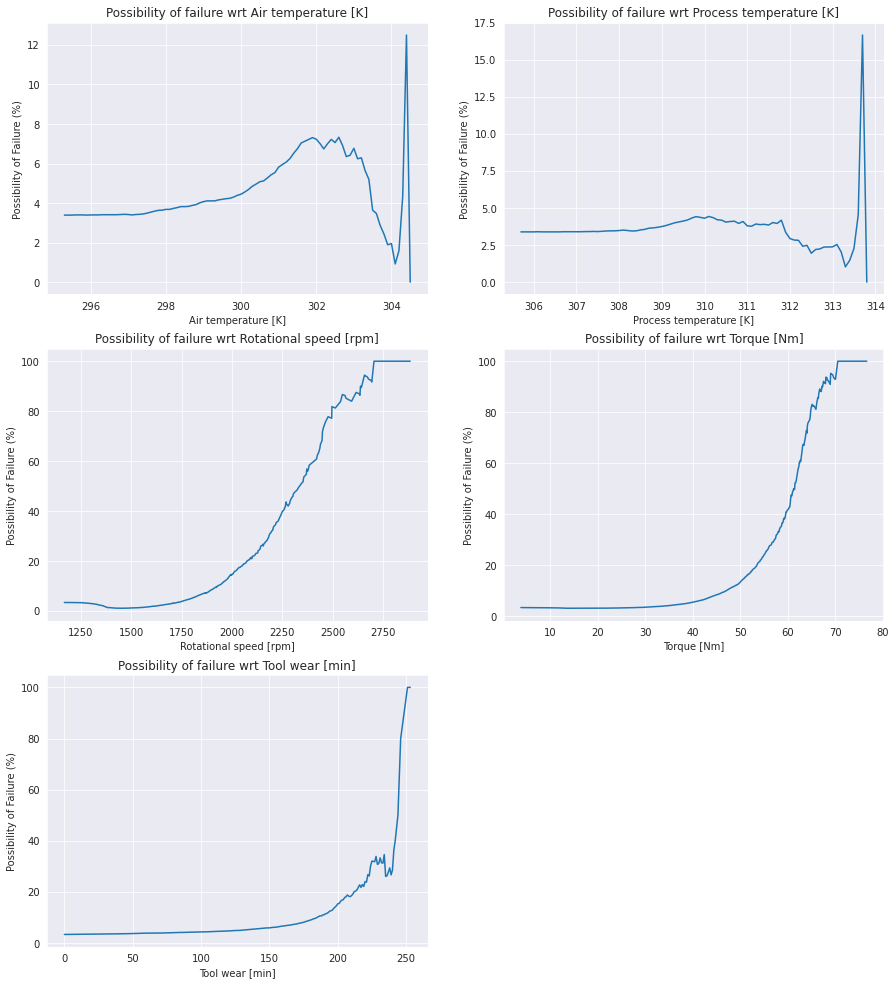

In [21]:
plt.figure(figsize=(15,17))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m).set_title(label=("Possibility of failure wrt "+i))
    x,y = feat_prob(i,data)
    plt.xlabel(i)
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x)
    m+=1

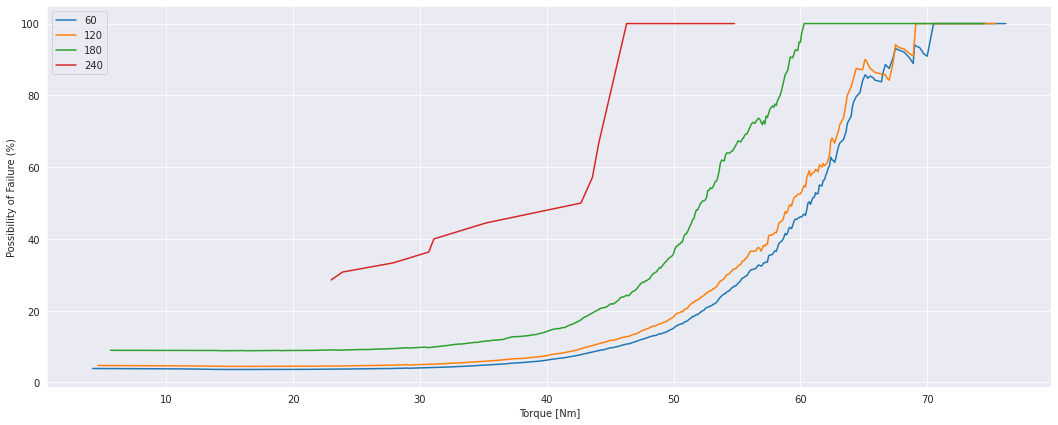

In [22]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in [60,120,180,240]:
    datasets.append(data[data['Tool wear [min]']>=i])

for i in datasets :
    x,y = feat_prob("Torque [Nm]",i)
    plt.xlabel("Torque [Nm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend([60,120,180,240])

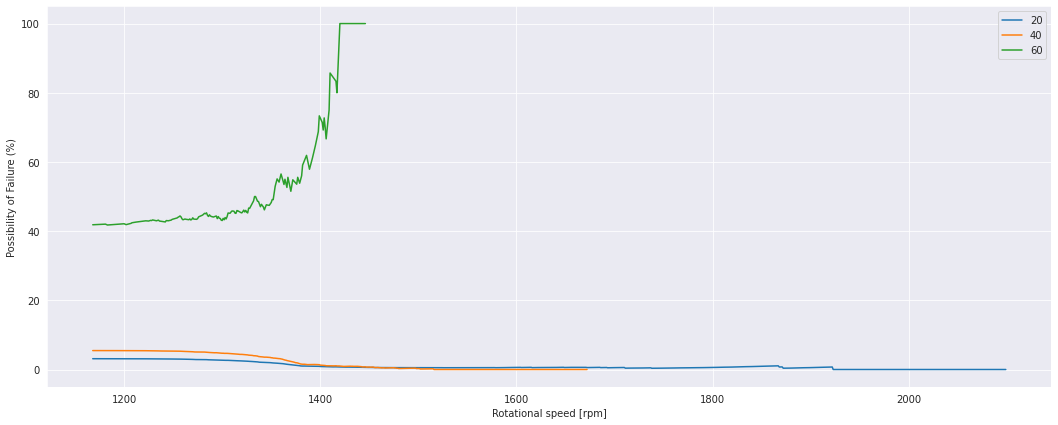

In [23]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in [20,40,60]:
    datasets.append(data[data['Torque [Nm]']>=i])

for i in datasets :
    x,y = feat_prob("Rotational speed [rpm]",i)
    plt.xlabel("Rotational speed [rpm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend([20,40,60])

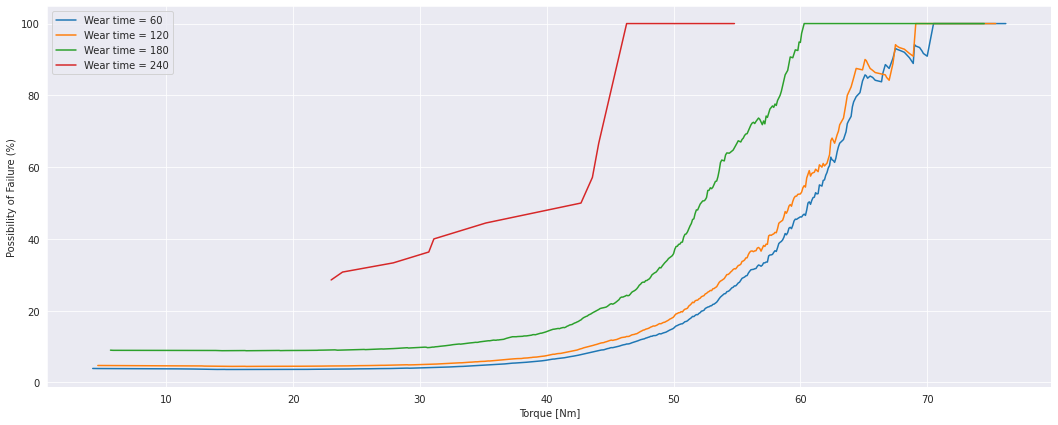

In [24]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in [60,120,180,240]:
    datasets.append(data[data['Tool wear [min]']>=i])

for i in datasets :
    x,y = feat_prob("Torque [Nm]",i)
    plt.xlabel("Torque [Nm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend(["Wear time = " + "60",
            "Wear time = "+'120',
            "Wear time = "+'180',
            "Wear time = "+'240'])

#Failure chance by Tool Type vs Torque

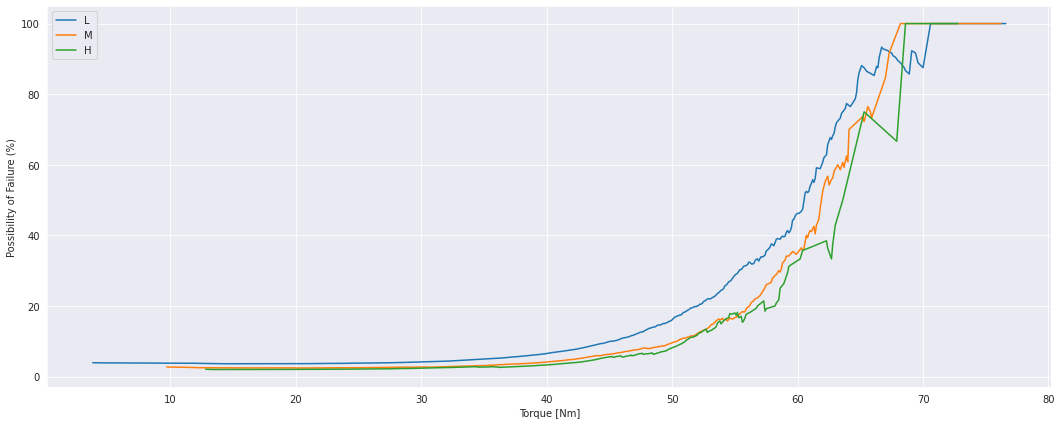

In [25]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in ["L","M","H"]:
    datasets.append(data[data['Type']==i])

for i in datasets :
    x,y = feat_prob("Torque [Nm]",i)
    plt.xlabel("Torque [Nm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend(["L","M","H"])

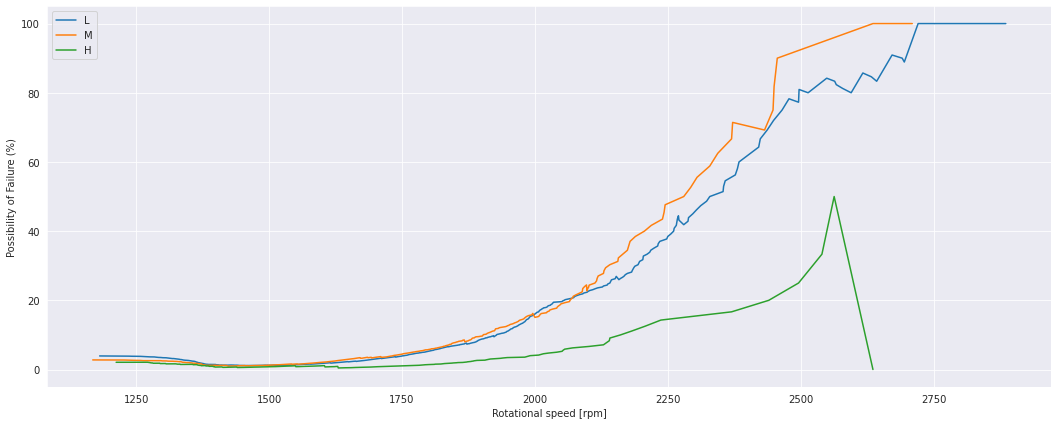

In [26]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in ["L","M","H"]:
    datasets.append(data[data['Type']==i])

for i in datasets :
    x,y = feat_prob("Rotational speed [rpm]",i)
    plt.xlabel("Rotational speed [rpm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend(["L","M","H"])

#Tool Type vs wear Time

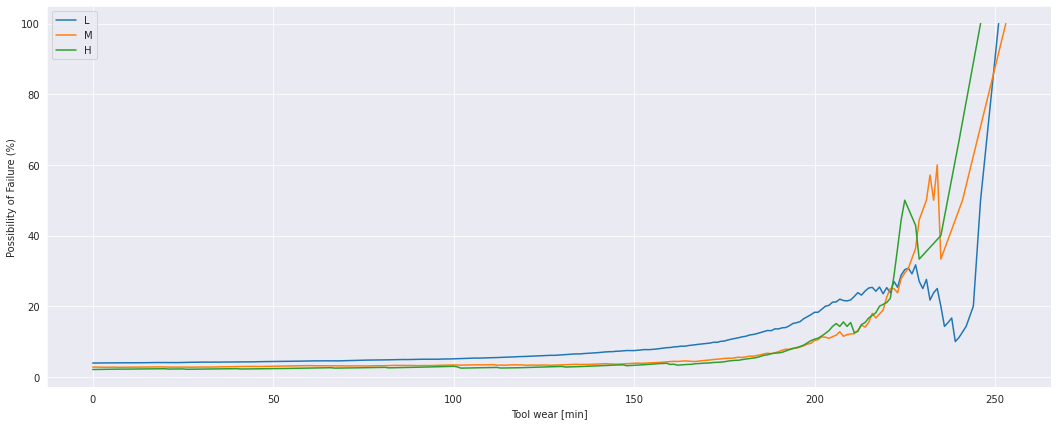

In [27]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in ["L","M","H"]:
    datasets.append(data[data['Type']==i])

for i in datasets :
    x,y = feat_prob("Tool wear [min]",i)
    plt.xlabel("Tool wear [min]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend(["L","M","H"])

In [28]:
data['nf'] = data['Tool wear [min]'] * data['Torque [Nm]']

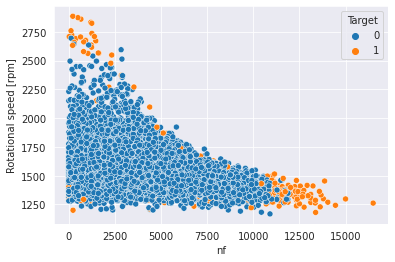

In [29]:
sns.scatterplot(data=data,x='nf',y='Rotational speed [rpm]',hue='Target')

# Prediction preprocessing
Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(data['Type'])
data['Type'] = label_encoder.transform(data['Type'])

label_encoder.fit(data['Target'])
data['Target'] = label_encoder.transform(data['Target'])

In [31]:
data.tail()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,nf
9995,2,298.8,308.4,1604,29.5,14,0,No Failure,413.0
9996,0,298.9,308.4,1632,31.8,17,0,No Failure,540.6
9997,2,299.0,308.6,1645,33.4,22,0,No Failure,734.8
9998,0,299.0,308.7,1408,48.5,25,0,No Failure,1212.5
9999,2,299.0,308.7,1500,40.2,30,0,No Failure,1206.0


In [32]:
data = data.rename(columns = {'Air temperature [K]':'airtemp', 'Process temperature [K]':'processtemp', 'Rotational speed [rpm]':'rpm', 'Torque [Nm]':'torque', 'Tool wear [min]':'toolwear'})

#Test Train Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Failure Type','Target'],axis=1),
                                                    data['Target'], test_size=0.3, random_state=42)

# Prediction

In [35]:
import time

from sklearn.metrics import accuracy_score,classification_report
classifier=[]
imported_as=[]

#LGBM
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
classifier.append('LightGBM')
imported_as.append('lgbm')

#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
classifier.append('Multi Layer Perceptron')
imported_as.append('mlp')

#Bagging
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
classifier.append('Bagging')
imported_as.append('bc')

#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
classifier.append('Gradient Boosting')
imported_as.append('gbc')

#ADA
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classifier.append('Ada Boost')
imported_as.append('ada')

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier() 
classifier.append('XG Boost')
imported_as.append('xgb')

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')

#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

#Grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
classifier.append('SVM tuning grid')
imported_as.append('grid')

#STcaking
from sklearn.ensemble import StackingClassifier
estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr',SVC(random_state=42))]
stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
classifier.append('Stacked (RFR & SVM)')
imported_as.append('stc')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


In [36]:
display(classifiers)

,Classifier,Imported as
0,LightGBM,lgbm
1,Multi Layer Perceptron,mlp
2,Bagging,bc
3,Gradient Boosting,gbc
4,Ada Boost,ada
5,XG Boost,xgb
6,Logistic Regression,lr
7,Random Forest,rfc
8,k Nearest Neighbours,knn
9,Support Vector Machine,svc


In [37]:
models_to_test = [bc,gbc,ada,rfc,mlp,lr,knn,stc]

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         7000 non-null   int64  
 1   airtemp      7000 non-null   float64
 2   processtemp  7000 non-null   float64
 3   rpm          7000 non-null   int64  
 4   torque       7000 non-null   float64
 5   toolwear     7000 non-null   int64  
 6   nf           7000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 437.5 KB


In [42]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models
    
    def fit(self):
        model_acc = []
        model_time= []
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):    
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})
        
    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)
        
    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])
    
    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])
    
    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))
    
    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))
    
    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))

In [44]:
display(classifiers)

,Classifier,Imported as
0,LightGBM,lgbm
1,Multi Layer Perceptron,mlp
2,Bagging,bc
3,Gradient Boosting,gbc
4,Ada Boost,ada
5,XG Boost,xgb
6,Logistic Regression,lr
7,Random Forest,rfc
8,k Nearest Neighbours,knn
9,Support Vector Machine,svc


In [45]:
models_to_test = [bc,gbc,ada,rfc,mlp,lr,knn,stc]

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         7000 non-null   int64  
 1   airtemp      7000 non-null   float64
 2   processtemp  7000 non-null   float64
 3   rpm          7000 non-null   int64  
 4   torque       7000 non-null   float64
 5   toolwear     7000 non-null   int64  
 6   nf           7000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 437.5 KB


In [43]:

classification = Modelling(X_train,y_train,X_test,y_test,models_to_test)
classification.fit()

BaggingClassifier() has been fit
GradientBoostingClassifier() has been fit
AdaBoostClassifier() has been fit
RandomForestClassifier() has been fit
MLPClassifier() has been fit
LogisticRegression() has been fit
KNeighborsClassifier(n_neighbors=1) has been fit
StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr', SVC(random_state=42))],
                   final_estimator=LogisticRegression()) has been fit


In [47]:
classification.results()

,Models,Accuracy,Runtime (s)
0,BaggingClassifier,99.000,0.254711
1,RandomForestClassifier,98.900,0.884990
2,StackingClassifier,98.867,1.991435
3,GradientBoostingClassifier,98.800,1.015293
4,AdaBoostClassifier,97.667,0.354035
5,MLPClassifier,97.367,1.555729
6,LogisticRegression,97.333,0.152664
7,KNeighborsClassifier,96.067,0.169096


In [48]:
print('BestModel is:',  classification.best_model(type='name'))
print('Accuracy of model:',classification.best_model_accuracy())
print('Training Runtime in seconds',classification.best_model_runtime())
print('Classification Matrix:\n')
print(classification.best_model_clmatrix())

BestModel is: BaggingClassifier
Accuracy of model: 99.0
Training Runtime in seconds 0.255
Classification Matrix:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.92      0.74      0.82        93

    accuracy                           0.99      3000
   macro avg       0.96      0.87      0.91      3000
weighted avg       0.99      0.99      0.99      3000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



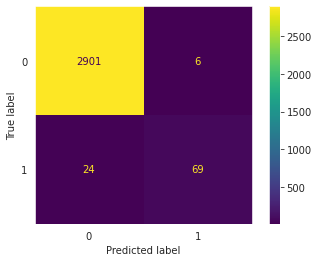

In [49]:
sns.set_style("darkgrid", {"grid.color": "1", "grid.linestyle": " "})

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classification.best_model(type='model'), X_test, y_test) 

# We try Naive Bayes here

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          10000 non-null  int64  
 1   airtemp       10000 non-null  float64
 2   processtemp   10000 non-null  float64
 3   rpm           10000 non-null  int64  
 4   torque        10000 non-null  float64
 5   toolwear      10000 non-null  int64  
 6   Target        10000 non-null  int64  
 7   Failure Type  10000 non-null  object 
 8   nf            10000 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 703.2+ KB


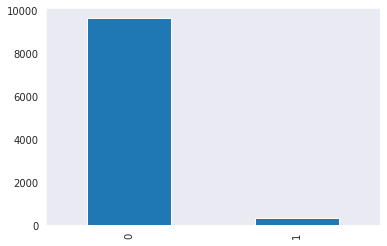

In [52]:
data['Target'].value_counts().plot(kind='bar');

In [54]:
X=data[['Type','airtemp','processtemp','rpm','torque','toolwear']]
y=data[['Target']]

In [55]:
X.shape,y.shape

((10000, 6), (10000, 1))

In [56]:
X=X.values
y=y.values

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [58]:
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

In [59]:
X=ct1.fit_transform(X)

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
y=le.fit_transform(y.ravel())

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)

In [64]:
y_train=np.array(y_train)

In [65]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_res, y_res = sm.fit_resample(X_train, y_train) 

In [66]:
X_res.shape,y_res.shape

((15460, 8), (15460,))

In [67]:
X_res = sc.fit_transform(X_res)
X_test = sc.transform(X_test)

In [68]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_res, y_res)

GaussianNB()

In [69]:
y_pred=classifier.predict(X_test)

In [70]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 0]
 [1 0]]


In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1470  461]
 [  16   53]]


0.7615

In [72]:
recall_score(y_test,y_pred)

0.7681159420289855

In [73]:
precision_score(y_test,y_pred)

0.10311284046692606

In [74]:
f1_score(y_test,y_pred)

0.18181818181818182

#Now we use Random Forest Classifier

In [77]:
#Read the dataset again:
df = pd.read_csv (r'sample_data/predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [78]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [79]:
df_numeric = df.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
df_cat    = df.loc[:,['Type']]

Exploratory Data Analysis - Numerical Features

In [80]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9096b0ed90>,
      dtype=object)

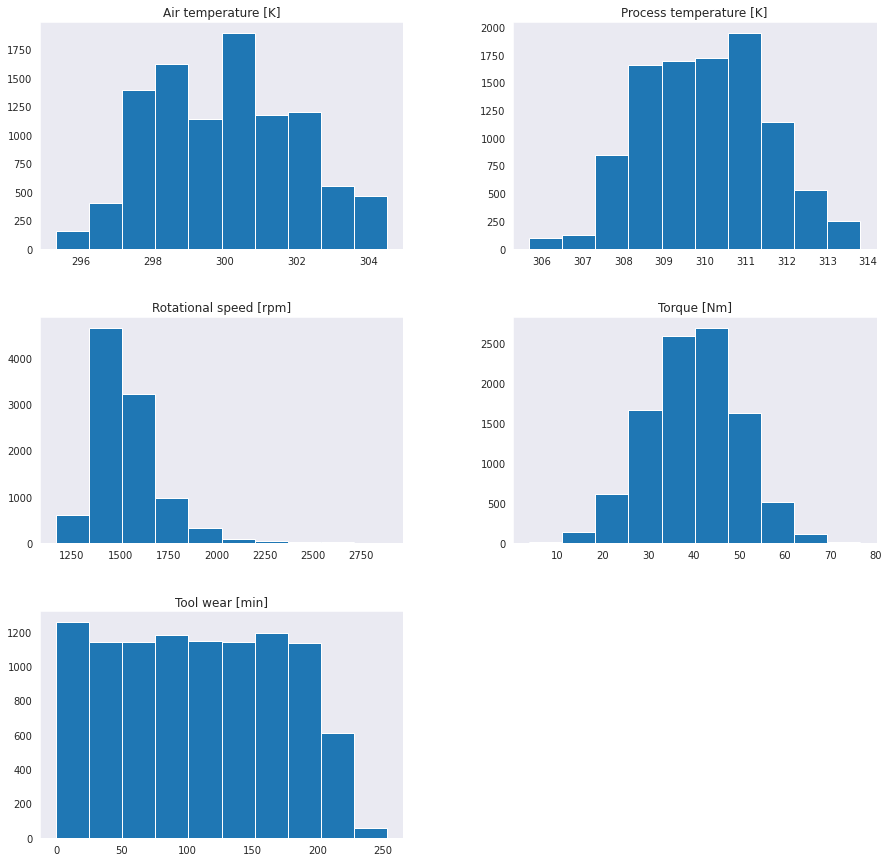

In [81]:
import matplotlib.pyplot as plt
import plotly.express as px

fig = plt.figure(figsize = (15,15))
ax  = fig.gca()

df_numeric.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']].hist(ax = ax)

If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed

In [82]:
df_numeric.skew()

Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
dtype: float64

#Categorical features

In [83]:
# Observe distrubution of failures
import plotly.graph_objects as go
import plotly.express as px

fig = px.pie(df,
             title  = 'Failure Types',
             values = 'UDI',
             names  = 'Failure Type')
fig.show()

the dataset is highly imbalanced where the machine failure consist only 3.2% of the whole dataset

In [84]:
# Air Temperature relation with Target/Failure Type
fig = px.box(df,
             y      =  "Air temperature [K]",
             x      =  "Target",
             title  =  "Air Temperature relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

# Process Tempearture relation with Target/Failure Type
fig = px.box(df,
             y      =  "Process temperature [K]",
             x      =  "Target",
             title  =  "Process Tempearture relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

# Rotational speed [rpm] relation with Target/Failure Type
fig = px.box(df,
             y      =  "Air temperature [K]",
             x      =  "Target",
             title  =  "Rotational speed [rpm] relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

# Torque [Nm] relation with Target/Failure Type
fig = px.box(df,
             y      =  "Torque [Nm]",
             x      =  "Target",
             title  =  "Torque [Nm] relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

# Tool wear [min] relation with Target/Failure Type
fig = px.box(df,
             y      =  "Tool wear [min]",
             x      =  "Target",
             title  =  "Tool wear [min] relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

In [85]:
# Correlation with Product ID with Failure
pd.pivot_table(df,
               index   = 'Failure Type', 
               columns = 'Type', 
               values  = 'UDI',
               aggfunc ='count')

Type,H,L,M
Failure Type,,,
Heat Dissipation Failure,8,74,30
No Failure,979,5757,2916
Overstrain Failure,1,73,4
Power Failure,5,59,31
Random Failures,4,12,2
Tool Wear Failure,6,25,14


In [86]:
pd.pivot_table(df,
               index   = 'Target', 
               columns = 'Type', 
               values  = 'UDI',
               aggfunc ='count')

Type,H,L,M
Target,,,
0,982,5765,2914
1,21,235,83


we can see that machine Type L has higher tendency to fail

 the EDA process, the dataset has no missing data and anomalies to deal with. However, columns like UDI and Product ID may not contribute to the prediction performance. Thus, these two columns will be removed in Data Preprocessing Step

In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Type']         = le.fit_transform(df.loc[:,["Type"]].values)
df['Failure Type'] = le.fit_transform(df.loc[:,["Failure Type"]].values)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [88]:
df = df.drop(["UDI","Product ID"],axis = 1)

Split Training and Test datasets

In [89]:
from sklearn.model_selection import train_test_split

X  = df.iloc[:, :-2].values
y  = df.loc[:,['Target','Failure Type']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
from sklearn.preprocessing import StandardScaler

scaler       = StandardScaler()
X_train_sc   = scaler.fit_transform(X_train)                
X_test_sc    = scaler.transform(X_test)                     

#Support Vector classification

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

In [92]:
svc     = SVC()
svc_clf = MultiOutputClassifier(estimator=svc)

svc_clf.fit(X_train, y_train)

print("Multi-Output Training Accuracy: ", svc_clf.score(X_train, y_train)*100, "%")

Multi-Output Training Accuracy:  96.5375 %


In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Test the Model 
y_pred_svc   = svc_clf.predict(X_test)

In [94]:
print("Test Accuracy (Target)       : ",accuracy_score(y_test[:,0], y_pred_svc[:,0])*100,"%")
print("Test Precision (Target)      : ",precision_score(y_test[:,0], y_pred_svc[:,0])*100,"%")
print("Test Recall (Target)         : ",recall_score(y_test[:,0], y_pred_svc[:,0])*100,"%")
print("Test Accuracy (Failure Type) : ",accuracy_score(y_test[:,1], y_pred_svc[:,1])*100,"%")

Test Accuracy (Target)       :  96.55 %
Test Precision (Target)      :  100.0 %
Test Recall (Target)         :  4.166666666666666 %
Test Accuracy (Failure Type) :  96.39999999999999 %


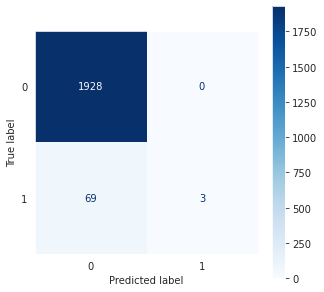

In [95]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


cm             = confusion_matrix(y_test[:,0],
                                  y_pred_svc[:,0])

disp           = ConfusionMatrixDisplay(confusion_matrix=cm,)

fig, ax        = plt.subplots(figsize = (5,5))

disp.plot(cmap = plt.cm.Blues,
          ax   = ax)

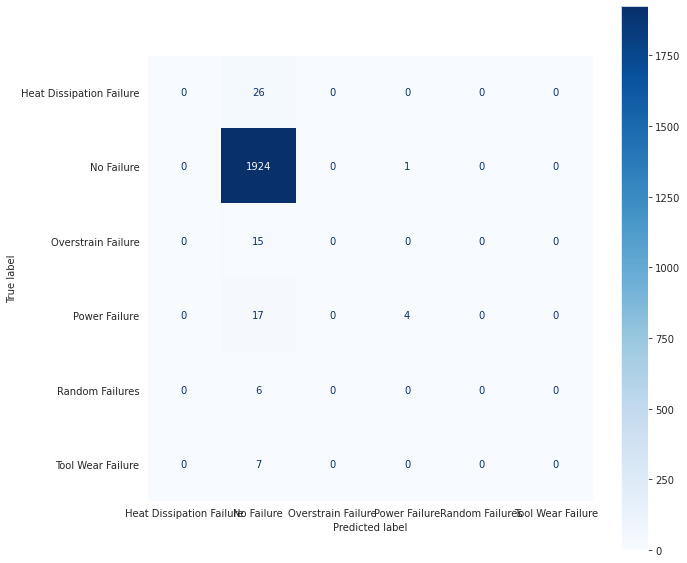

In [96]:
cm      = confusion_matrix(y_test[:,1],
                           y_pred_svc[:,1])

disp    = ConfusionMatrixDisplay(confusion_matrix = cm,
                                 display_labels   = ['Heat Dissipation Failure','No Failure','Overstrain Failure','Power Failure','Random Failures','Tool Wear Failure'])

fig, ax = plt.subplots(figsize = (10,10))

disp.plot(cmap = plt.cm.Blues,
          ax   = ax)

#XgBoost

In [97]:
import xgboost as xgb
from xgboost import XGBClassifier

In [98]:
xgb_clf = MultiOutputClassifier(XGBClassifier())
xgb_clf.fit(X_train, y_train)
print("Multi-Output Training Accuracy: ", xgb_clf.score(X_train, y_train)*100, "%")

Multi-Output Training Accuracy:  98.825 %


In [99]:
# Test the Model 
y_pred_xgb   = xgb_clf.predict(X_test)

In [100]:
# Performance Metrics
print("Test Accuracy (Target)       : ",accuracy_score(y_test[:,0], y_pred_xgb[:,0])*100,"%")
print("Test Precision (Target)      : ",precision_score(y_test[:,0], y_pred_xgb[:,0])*100,"%")
print("Test Recall (Target)         : ",recall_score(y_test[:,0], y_pred_xgb[:,0])*100,"%")
print("Test Accuracy (Failure Type) : ",accuracy_score(y_test[:,1], y_pred_xgb[:,1])*100,"%")

Test Accuracy (Target)       :  98.0 %
Test Precision (Target)      :  79.62962962962963 %
Test Recall (Target)         :  59.72222222222222 %
Test Accuracy (Failure Type) :  98.15 %


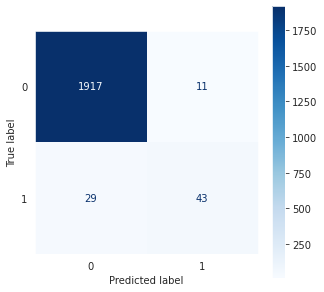

In [101]:
# Confusion Matrix
cm             = confusion_matrix(y_test[:,0],
                                  y_pred_xgb[:,0])

disp           = ConfusionMatrixDisplay(confusion_matrix=cm,)

fig, ax        = plt.subplots(figsize = (5,5))

disp.plot(cmap = plt.cm.Blues,
          ax   = ax)

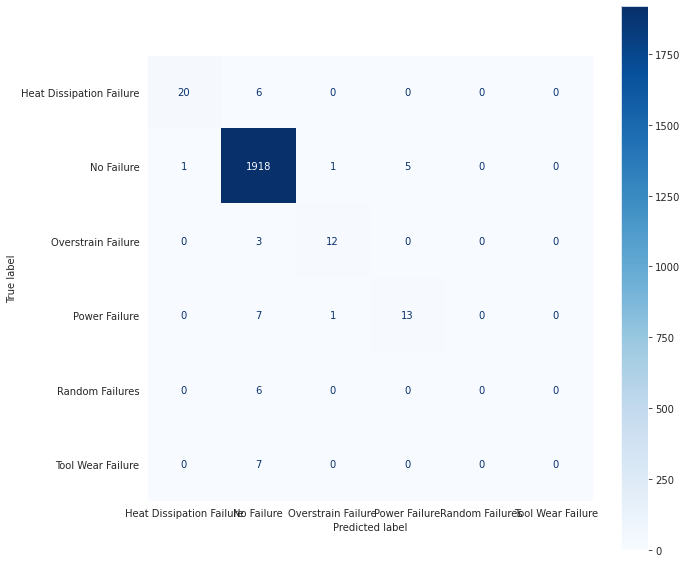

In [102]:
cm      = confusion_matrix(y_test[:,1],
                           y_pred_xgb[:,1])

disp    = ConfusionMatrixDisplay(confusion_matrix = cm,
                                 display_labels   = ['Heat Dissipation Failure','No Failure','Overstrain Failure','Power Failure','Random Failures','Tool Wear Failure'])

fig, ax = plt.subplots(figsize = (10,10))

disp.plot(cmap = plt.cm.Blues,
          ax   = ax)

XGBoost is an absolute win based on numbers. Based on confusion matrix, SVC is definitely a no-go. It is observed that there are many Failures were misclassified as No Failure.